# Bayesian Leaning Example on Iris Dataset

---

Author: Mohammad Arabzadeh


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bayesian import Bayes, NaiveBayes
from itertools import combinations
from sklearn.datasets import load_iris

## Load Iris Data

In [3]:
# save load_iris() sklearn dataset to iris
iris = load_iris()

# save target names
targets = iris['target_names']

# convert iris to a DataFrame
df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names']+['target'],
)


In [4]:
# show 5 samples of the DataFrame
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
8,4.4,2.9,1.4,0.2,0.0
52,6.9,3.1,4.9,1.5,1.0
22,4.6,3.6,1.0,0.2,0.0
6,4.6,3.4,1.4,0.3,0.0
19,5.1,3.8,1.5,0.3,0.0


## Exploratory Data Analysis

In [5]:
# create a new DataFrame with targets equal to target names
df_eda = df.copy()
df_eda['target'].replace(
    {0: targets[0], 1: targets[1], 2: targets[2]}, 
    inplace=True,
)

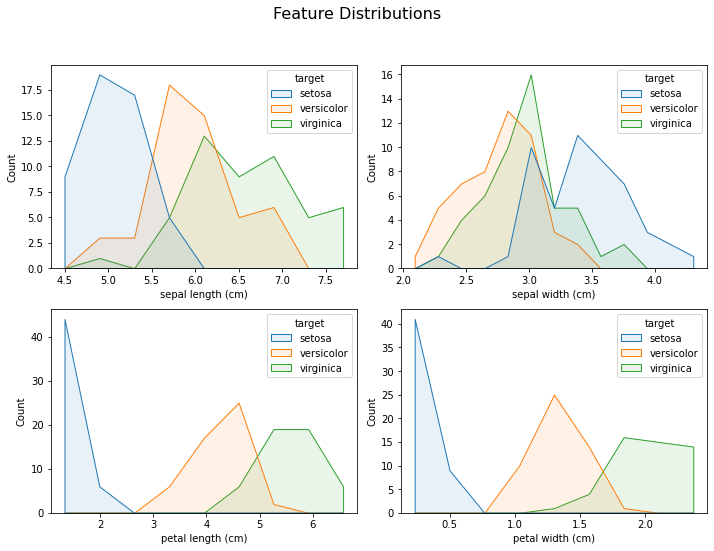

In [6]:
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
fig.set_figheight(2*4)
fig.set_figwidth(2*5)

# plot distribusions
for ax, x in zip(axs, df_eda.iloc[:, :-1].columns):
    sns.histplot(
        df_eda,
        x=x,
        hue='target',
        element='poly',
        alpha=0.1,
        ax=ax,
    )

fig.suptitle("Feature Distributions", fontsize=16)
fig.tight_layout(pad=1, rect=[0, 0.03, 1, 0.94])
fig.show()

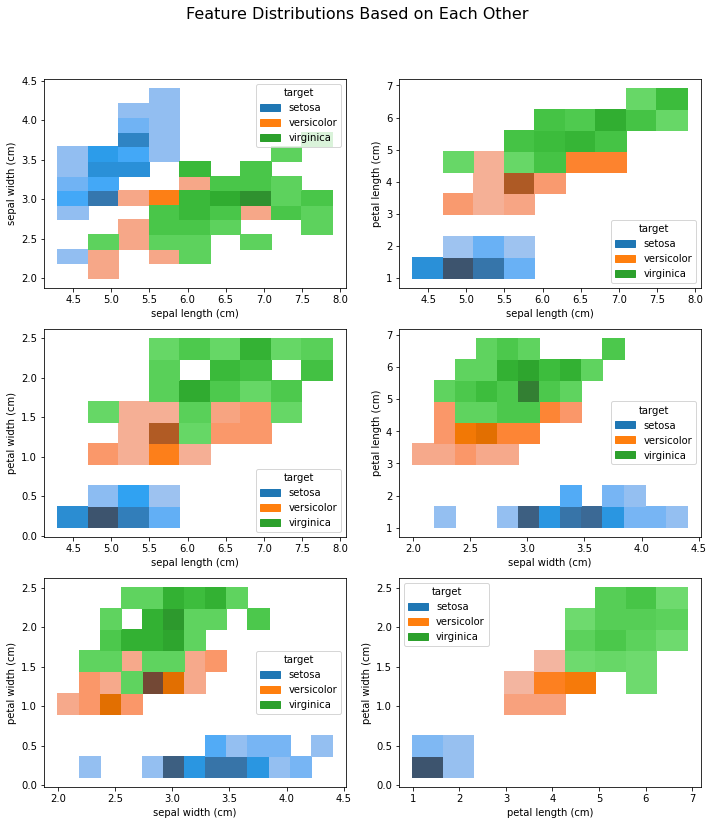

In [7]:
fig, axs = plt.subplots(3, 2)
axs = axs.ravel()
fig.set_figheight(3*4)
fig.set_figwidth(2*5)

# plot distribusions
for ax, xy in zip(axs, combinations(df_eda.iloc[:, :-1].columns, 2)):
    sns.histplot(
        df_eda,
        x=xy[0],
        y=xy[1],
        hue='target',
        ax=ax,
    )

# move legends to the desired positions
leg_pos = [
    "upper right",
    "lower right",
    "lower right",
    "center right",
    "center right",
    "upper left",
]
for ax, pos in zip(axs, leg_pos):
    sns.move_legend(ax, pos)


fig.suptitle("Feature Distributions Based on Each Other", fontsize=16)
fig.tight_layout(pad=1, rect=[0, 0.03, 1, 0.94])
fig.show()

## Bayes

In [8]:
bayes = Bayes(num_targets=targets.shape[0])

iter  train  test
1     0.97   1.00
2     0.98   0.98
avg   0.98   0.99



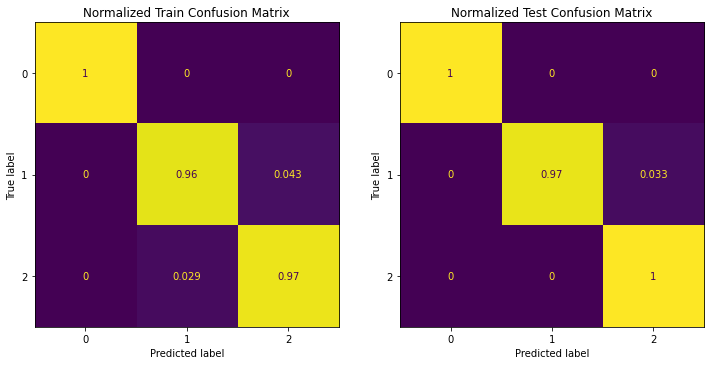

In [10]:
bayes.train(df, train_frac=0.7, iterations=2, diag_cov=False)

iter  train  test
1     0.94   0.98
2     0.95   0.98
avg   0.95   0.98



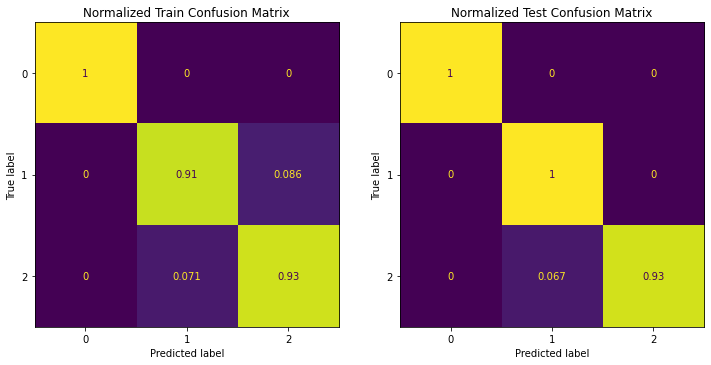

In [11]:
bayes.train(df, train_frac=0.7, iterations=2, diag_cov=True)

fold  train  test
1     0.97   1.00
2     0.99   0.92
3     0.99   0.95
4     0.98   1.00
avg   0.98   0.97



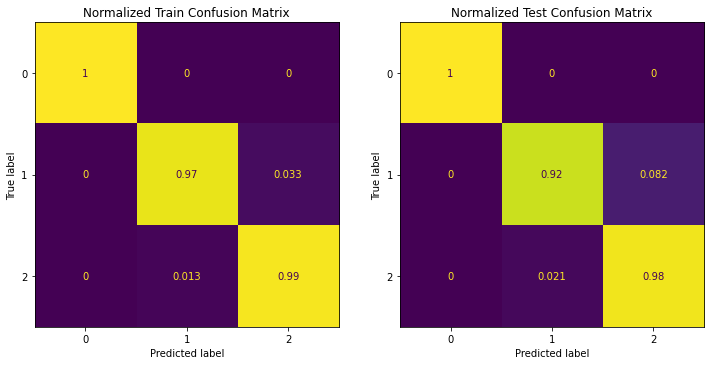

In [12]:
bayes.train(df, kfold=True, iterations=4, diag_cov=False)

fold  train  test
1     0.96   0.95
2     0.96   0.95
3     0.96   0.92
4     0.96   1.00
avg   0.96   0.95



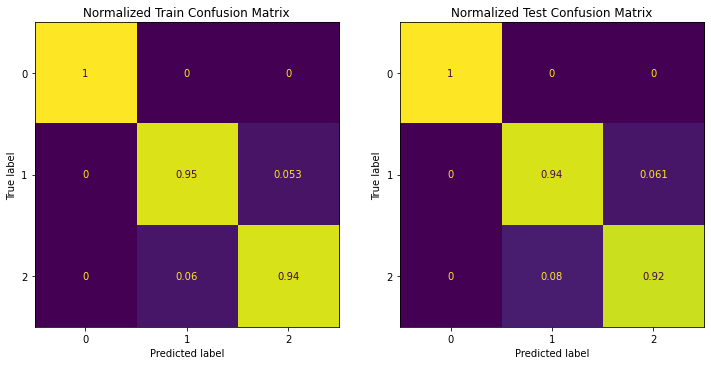

In [13]:
bayes.train(df, kfold=True, iterations=4, diag_cov=True)

## Naive Bayes

In [14]:
naive_bayes = NaiveBayes(num_targets=targets.shape[0])

iter  train  test
1     0.94   0.98
2     0.95   0.98
avg   0.95   0.98



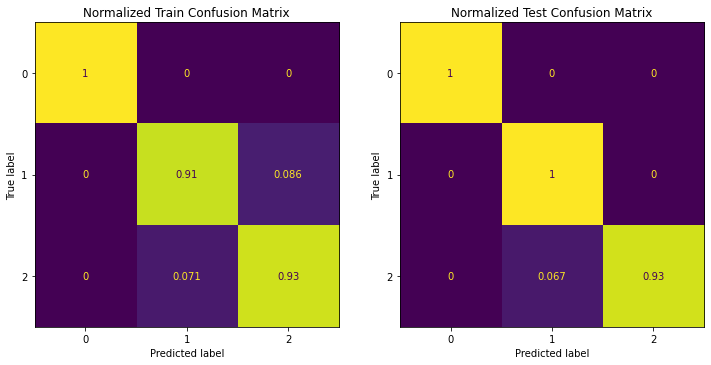

In [15]:
naive_bayes.train(df, train_frac=0.7, iterations=2)

fold  train  test
1     0.96   0.95
2     0.96   0.95
3     0.96   0.92
4     0.96   1.00
avg   0.96   0.95



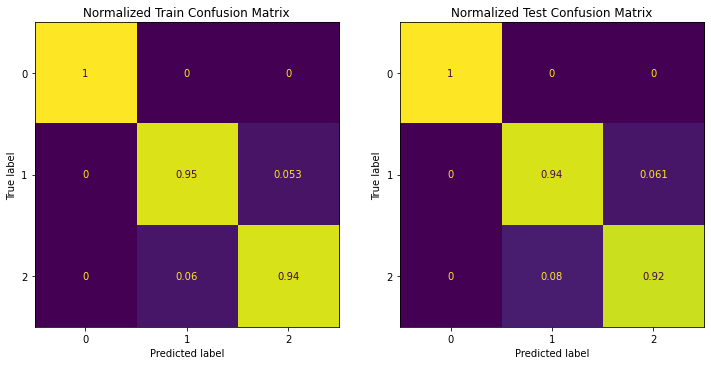

In [16]:
naive_bayes.train(df, kfold=True, iterations=4)